Notebook to perform K-Means clustering of calcium activity data in a time series
Created by: Michael Martin
Date: April 04, 2020

Outline of the plan is:

import modules

get path to data & get kept ROIs

store data in a way that is accesible

PCA for dimensionality reduction while retaining ROI identities

K means clustering on lower dimensionality data

save/plot clustered data

In [62]:
import os 
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.preprocessing
import sklearn.decomposition #for PCA

pca = sklearn.decomposition.PCA(n_components=2)

File path to data

In [63]:
main_path  = 'C:/Users/mmart/Documents/Analysis/Mar.5.20_HUC6f_8dpf_WFtoBF_1D-s5/'
roi_path   = main_path+"roi_data.npy"
rois = np.load(roi_path, allow_pickle=True)
# tail_path  = main_path+"Mar.10.20_2C_tail_angles1.csv"
# video_path = main_path+"Mar.10.20_HUC6f_fish2_6dpf_loom_lv30_2C-1_mc_ALL.tif"

In [64]:
temporal_footprints   = rois[()]['roi_temporal_footprints']
temp_residuals        = rois[()]['roi_temporal_residuals']
spatial_footprints    = rois[()]['roi_spatial_footprints']
bg_temp_footprints    = rois[()]['bg_temporal_footprints']
bg_spatial_footprints = rois[()]['bg_spatial_footprints']
removed_rois          = rois[()]['all_removed_rois']

kept_rois = [ i for i in range(temporal_footprints[0].shape[0]) if i not in removed_rois[0]] #only a single plane to start
# myst_vals = rois[()]
# print(myst_vals)
# print(temporal_footprints)

kept_temporal_footprints = temporal_footprints[0][kept_rois]
# roi_spatial_footprints = spatial_footprints[0].transpose()
# roi_spatial_footprints = spatial_footprints[0].toarray().reshape((video.shape[2], video.shape[3], spatial_footprints[z].shape[-1])).transpose((0, 1, 2))



In [65]:
# temporal_footprints[0].shape
print(temporal_footprints[0].shape)
kept_temporal_footprints = temporal_footprints[0][kept_rois]
print(kept_temporal_footprints.shape)
# print(roi_spatial_footprints[0].shape)
# kept_roi_spatial_footprints = roi_spatial_footprints[0][kept_rois]
# transposed_spatial = kept_roi_spatial_footprints.transpose()
# # print(kept_roi_spatial_footprints.shape)
# print(transposed_spatial.shape)

(80, 110)
(19, 110)


In [78]:
#Scale data before performing PCA
scaled_data = sklearn.preprocessing.scale(kept_temporal_footprints)
numeric_data = pd.DataFrame(scaled_data)

#Perform PCA
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)


In [79]:
type(principal_components)
principal_components.shape

(19, 2)

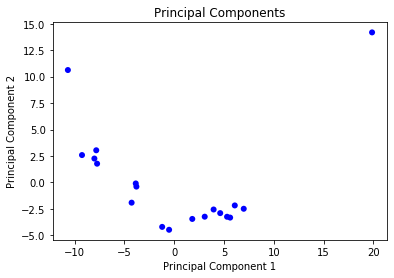

In [80]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components")
plt.scatter(x, y, color = 'blue', edgecolors = 'none')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [91]:
kmeans = sklearn.cluster.KMeans(n_clusters=5) # n=3 is arbitrary, will perform other calculations to figure it out
clustered_data = kmeans.fit(principal_components)

In [92]:
# print(clustered_data)
kmeans.labels_

array([1, 1, 4, 1, 1, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0])

In [ ]:
#THIS CELL IS TAKEN FROM THE EDX HOMEWORK, TWO CELLS PUT INTO 1
#THIS WILL BE REMOVED BEFORE GOING PUBLIC, I JUST WANTED TO
#KEEP IT SO I DIDN'T HAVE TO LOOK UP pca AND knn EVERY TIME
#I WANTED TO REFERENCE THEIR USE. 

import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)

import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

principal_components.shape

#///////////////////

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
# Enter your code here!

library_predictions = knn.predict(numeric_data)

print(accuracy(library_predictions, data['high_quality']))